In [1]:
import numpy as np
import pandas as pd

PATH = "./dataset/"

train_df = pd.read_csv(PATH+"train.csv")
test_df = pd.read_csv(PATH+"test.csv")

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# From https://www.kaggle.com/gpreda/santander-eda-and-prediction
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [4]:
missing_data(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,0,177,0,0,0,0,687,2
Percent,0,0,0,0,0,19.8653,0,0,0,0,77.1044,0.224467
Types,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [5]:
missing_data(test_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,86,0,0,0,1,327,0
Percent,0,0,0,0,20.5742,0,0,0,0.239234,78.2297,0
Types,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [10]:
# Start dealing with missing data
# Age
miss_age = train_df.query("Age.isnull()")
miss_cabin = train_df.query("Cabin.isnull()")

In [11]:
miss_cabin.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,687.000000,687.000000,687.000000,529.000000,687.000000,687.000000,687.000000
mean,443.208151,0.299854,2.639010,27.555293,0.547307,0.365357,19.157325
std,259.215905,0.458528,0.589602,13.472634,1.207492,0.827106,28.663343
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,214.500000,0.000000,2.000000,19.000000,0.000000,0.000000,7.877100
50%,441.000000,0.000000,3.000000,26.000000,0.000000,0.000000,10.500000
75%,664.500000,1.000000,3.000000,35.000000,1.000000,0.000000,23.000000
max,891.000000,1.000000,3.000000,74.000000,8.000000,6.000000,512.329200


In [78]:
# From https://www.kaggle.com/gpreda/santander-eda-and-prediction
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.subplots(1,4,figsize=(15,7))

    for feature in features:
        i += 1
        plt.subplot(1,6,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

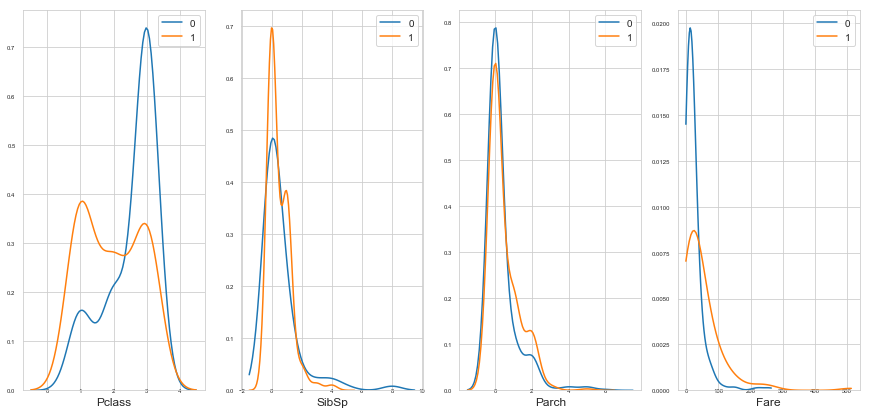

In [47]:
t0 = train_df.loc[train_df['Survived'] == 0]
t1 = train_df.loc[train_df['Survived'] == 1]
features = ['Pclass','SibSp','Parch','Fare']
plot_feature_distribution(t0, t1, '0', '1', features)

In [42]:
# Fill NaN value in test.Fare, ther's only one missing value so just fill it by mean value
test_mean_fare = test_df.Fare.mean()
test_df.Fare = test_df.Fare.fillna(test_mean_fare)

In [43]:
missing_data(test_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,86,0,0,0,0,327,0
Percent,0,0,0,0,20.5742,0,0,0,0,78.2297,0
Types,int64,int64,object,object,float64,int64,int64,object,float64,object,object


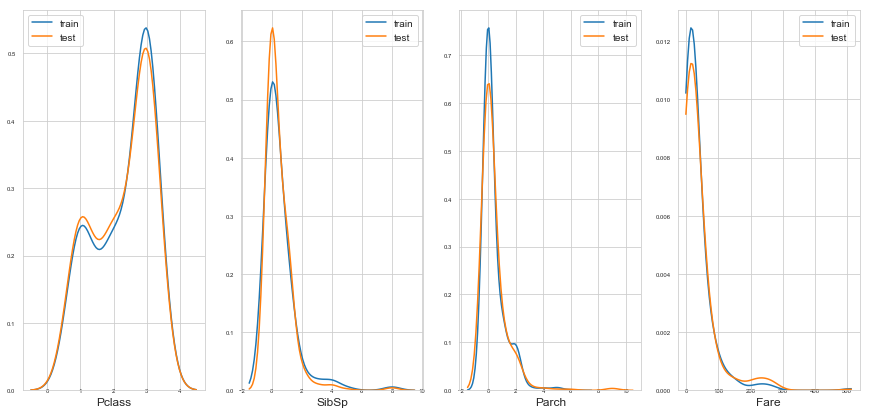

In [44]:
plot_feature_distribution(train_df, test_df, 'train', 'test', features)

In [49]:
# Replace Sex by number
train_df = train_df.replace('male', 1)
train_df = train_df.replace('female', 0)

test_df = test_df.replace('male', 1)
test_df = test_df.replace('female', 0)

In [63]:
corr_feat = ['Pclass','SibSp','Parch','Fare','Sex','Survived']
correlations = train_df[corr_feat].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations

,level_0,level_1,0
0,Pclass,Parch,0.018443
1,Parch,Pclass,0.018443
2,Survived,SibSp,0.035322
3,SibSp,Survived,0.035322
4,Parch,Survived,0.081629
5,Survived,Parch,0.081629
6,SibSp,Pclass,0.083081
7,Pclass,SibSp,0.083081
8,SibSp,Sex,0.114631
9,Sex,SibSp,0.114631


In [66]:
train_df['Age'] = train_df['Age'].fillna(-1)

In [69]:
test_df['Age'] = test_df['Age'].fillna(-1)

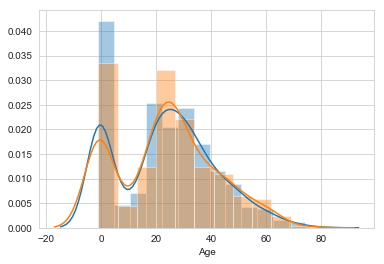

In [70]:
sns.distplot(train_df['Age'])
sns.distplot(test_df['Age'])

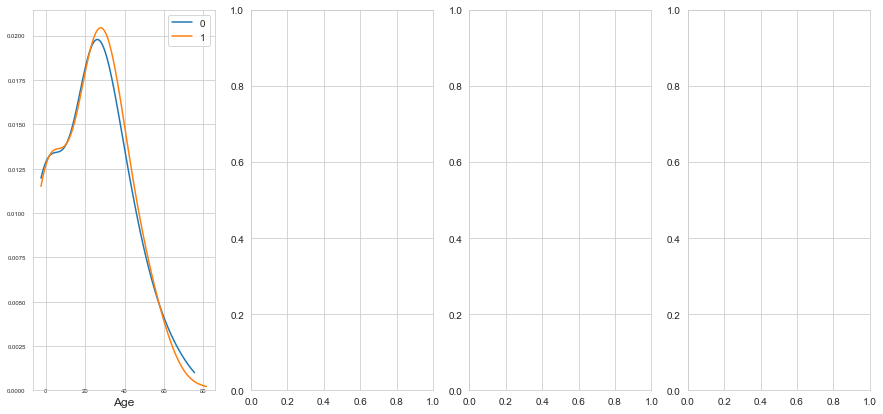

In [73]:
t0 = train_df.loc[train_df['Survived'] == 0]
t1 = train_df.loc[train_df['Survived'] == 1]
plot_feature_distribution(t0, t1, '0', '1', ['Age'])

In [76]:
train_df.groupby(['Embarked']).mean()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,,
C,445.357143,0.553571,1.886905,0.565476,23.618571,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,0.532468,9.577922,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,0.684783,25.190606,0.571429,0.413043,27.079812


In [77]:
train_df = train_df.replace('C', 3)
train_df = train_df.replace('Q', 2)
train_df = train_df.replace('S', 1)

test_df = test_df.replace('C', 3)
test_df = test_df.replace('Q', 2)
test_df = test_df.replace('S', 1)

In [80]:
missing_data(test_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,0,0,0,0,0,327,0
Percent,0,0,0,0,0,0,0,0,0,78.2297,0
Types,int64,int64,object,int64,float64,int64,int64,object,float64,object,int64


In [81]:
missing_data(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,0,0,0,0,0,0,687,2
Percent,0,0,0,0,0,0,0,0,0,0,77.1044,0.224467
Types,int64,int64,int64,object,int64,float64,int64,int64,object,float64,object,float64


In [82]:
train_df['Embarked'] = train_df['Embarked'].fillna(-1)

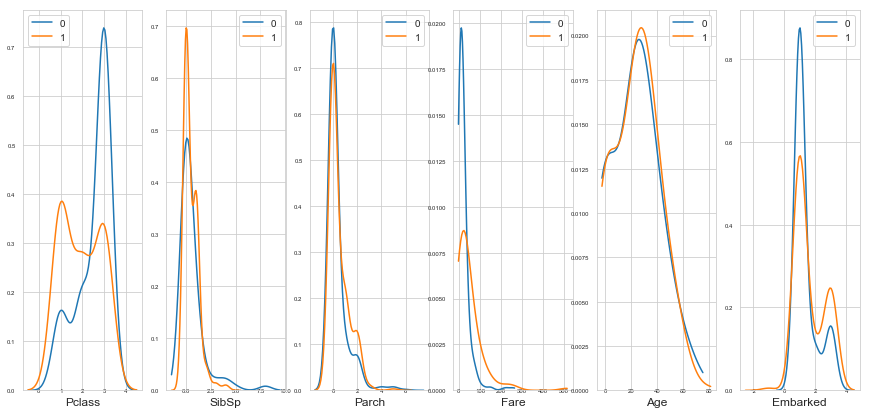

In [83]:
t0 = train_df.loc[train_df['Survived'] == 0]
t1 = train_df.loc[train_df['Survived'] == 1]
features = ['Pclass','SibSp','Parch','Fare','Age','Embarked']
plot_feature_distribution(t0, t1, '0', '1', features)

In [85]:
# Cabin has too much missing, dropped
train_df.drop(columns=['Cabin'],inplace=True)
test_df.drop(columns=['Cabin'],inplace=True)

In [87]:
missing_data(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Total,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0
Types,int64,int64,int64,object,int64,float64,int64,int64,object,float64,float64


In [88]:
train_df.to_csv("./dataset/clean_train.csv",index=False)
test_df.to_csv("./dataset/clean_test.csv",index=False)